**참고 사이트**

- [sklearn.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [sklearn.SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [서포트 벡터 머신 관련 유용한 블로그](https://hleecaster.com/ml-svm-concept/)

**서포트 벡터 머신(SVM)**은 다목적 머신러닝 모델

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR

#5.1 선형 SVM 분류

###**라지 마진 분류**

- 두 개의 클래스를 나누고 있으면서
- 제일 가까운 훈련 샘플로부터 가능한 한 멀리 떨어져 있는 결정경계를 찾는 것이다..
- 결정경계가 샘플에 너무 가까우면 새로운 샘플에는 잘 작동하지 못한다..

즉, **가장 폭(마진)이 넓은 도로**를 찾는 것이다.. 도로의 중앙선이 결정경계!!

**서포트 벡터**

: 도로의 경계에 위치한 샘플..

: **결정경계는 오로지 서포트 벡터에 따라 전적으로 결정된다..**

In [3]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

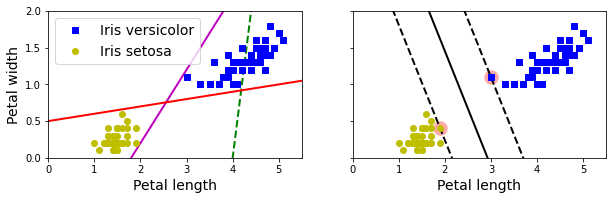

In [4]:
# 임의의 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

#SVC의 결정경계와 서포트벡터를 그려주는 함수..
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로 식을 정리하면
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]    #결정경계를 plt에 쓰기위해 식 조정

    margin = 1/w[1]     # ?
    gutter_up = decision_boundary + margin  #윗 마진..
    gutter_down = decision_boundary - margin    #아랫 마진..

    svs = svm_clf.support_vectors_     #서포트벡터가 특성에 저장되어 있음..
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

#나쁜예측 그리기
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

#SVC의 결정경계 그리기..
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

**분석**

- 왼쪽의 실선은 샘플들을 잘 구분하지만, 너무 샘플과 가까워서 새로운 데이터에 안 맞을 수도 있다
- 왼쪽의 점선은 분류 자체를 못하고 있다..
- 오른쪽의 점선사이의 공간이 가장 폭이 큰 도로다..
- 그 위에 있는 동그라미 친 샘플이 **서포트 벡터**
- 중앙의 실선이 결정 경계..

###**SVM은 스케일링에 민감**

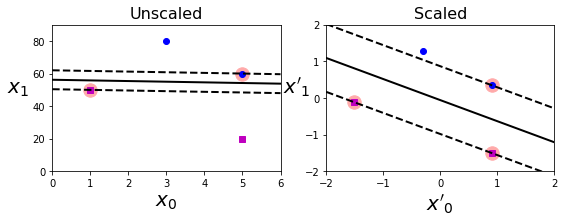

In [5]:
#데이터를 주고
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

#스케일링 안 한 데이터를 그대로 예측해서 그림..
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

#스케일링한 데이터를 예측해서 그림..
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()

##5.1.1 소프트 마진 분류

**마진**

- **이상치를 얼마나 허용할 지 결정함**
- 서포트 벡터와 결정경계 사이의 거리..
- SVM은 최대한 마진을 크게 하려고 노력..
- 이상치를 얼마나 허용하냐에 따라서 **하드 마진 / 소프트 마진**분류로 나뉨

###**하드 마진 분류**

- 모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있는 경우

- 문제점..

        - 데이터가 선형적으로 구분될 수 있어야 제대로 작동
        - 이상치에 민감하다

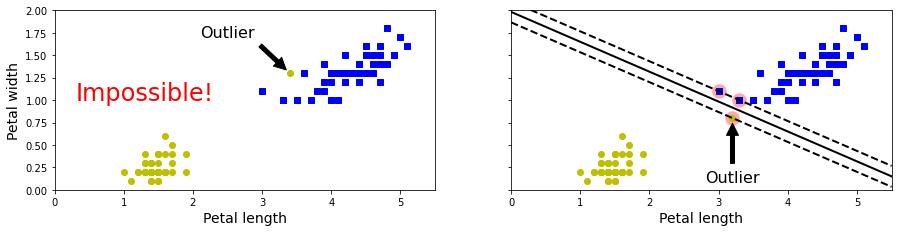

In [6]:
#하드마진의 문제점을 그래프화하는 코드..

#이상치 생성
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

#이상치를 원본 데이터에 합침..
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(15,3.3), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

**분석**

- 왼쪽은 아예 이상치 때문에 선형 분류(하드 마진분류)가 안됨..
- 오른쪽은 되긴한데 일반화가 안 될듯..

###**소프트 마진 분류**

- 하드 마진 분류의 문제점을 피하기 위한 더 유연한 모델..

- 도로의 폭을 넓게 유지해야 일반화에 좋다..
- 하지만 이상치 때문에 도로의 폭이 넓으면 **마진 오류**가 생길수도 있다..
- 이 둘 사이의 균형을 잘 잡아야 한다..
    - 매개변수 C가 작을수록 소프트 마진 분류.. C가 클수록 하드 마진 분류..

C에 따른 결정경계를 보여주는 그래프..

- StandardScaler()로 스케일링하고
- LinearSVC로 훈련해서 결정경계를 찾음
- 다시 원래 좌표공간으로 가중치와 편향을 스케일 복원해서 서포트벡터를 구함..


-> 그냥 SVC()로 훈련하면 되는거 아닌가..?

In [7]:
#데이터 준비..

X = iris["data"][:, (2,3)]  #꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)    #  Iris-Virginica

In [8]:
#각기 다른 매개변수 C를 갖는 모델을 스케일링 및 훈련..

from sklearn.svm import LinearSVC

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [9]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기
# 그냥 SVC에는 있는데 LinearSVC에는 서포트벡터 지원을 안한다..
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
#각 모델에 서포트벡터 샘플을 저장..
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

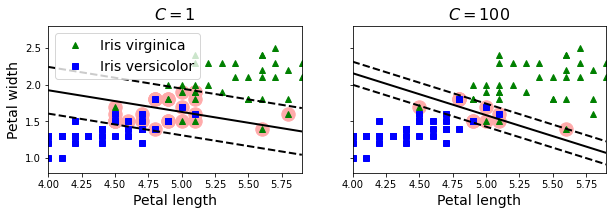

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.show()

###**교재의 코드**

In [11]:
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]  #꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)    #  Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        #하이퍼파라미터 지정..
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [12]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

**정리**

- 서포트벡터 기준으로 결정경계를 찾는다
    - SVC모델은 support_vectors_특성을 지원
    - LinearSVC모델은 지원 안 함
- 결정경계를 마진이 최대한 크도록 찾는다
- 매개변수 C를 기준으로 클수록 하드 마진, 작을수록 소프트 마진
    - 클수록 규제가 적은 것, 작을수록 규제가 많은 것
    - 하드 마진 : 이상치 허용에 딱딱함 (마진 오류 적음, 일반화 어려움)
    - 소프트 마진 : 이상치 허용에 부드러움 (마진 오류 있음, 일반화 좋음)


**모델**

- LinearSVC(C=1, loss="hinge")
    - 속도 1등..
- SVC(C=1, kernel="linear")
- SGDClassifier(loss="hinge", alpha=1/(m*C)
    - 속도면에서는 느리지만 데이터셋이 아주 클 때는 유용하다..

#5.2 비선형 SVM 분류

- 선형적으로 분류할 수 없는 데이터 셋이 많다..
- 다항 특성과 같이 특성을 더 추가해보면 선형적으로 구분되는 데이터셋이 만들어질 수 있다..

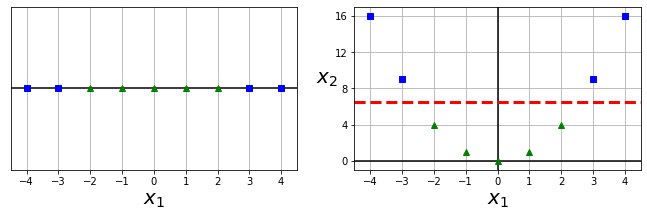

In [13]:
#특성이 하나인 데이터셋과 제곱 특성을 추가한 데이터셋 생성..
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])   #레이블..

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")    #레이블이 0인 4개의 샘플은 파랑네모
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")    #레이블이 1인 5개의 샘플은 초록세모
plt.gca().get_yaxis().set_ticks([]) #y축은 없다..
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
#위와 동일..
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])  #y축을 세워라..
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)   #구분선..
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

**분석**

- 특성을 추가한 오른쪽 데이터는 선형적으로 구분 가능

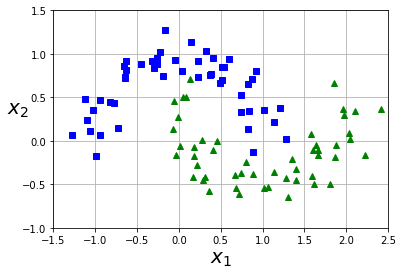

In [14]:
#데이터셋을 그래프화하는 코드..

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [15]:
#데이터셋 만들기..
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)    #100개만 가져옴..

#특성을 추가하고, 스케일링하고 예측하는 파이프라인
polynomial_svm_clf = Pipeline([
            ("poly_features", PolynomialFeatures(degree=3)),
            ("scaler", StandardScaler()),
            ("svm_clf", LinearSVC(C=10, loss="hinge")),
])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [16]:
#학습한 결정경계를 그리는 코드..

def plot_predictions(clf, axes):    #주어진 축에 대해서..
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)     #데이터를 예측한다
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

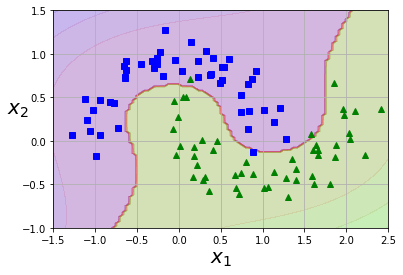

In [17]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

**분석**

- 3차로 특성을 늘렸다..
- random_state를 주지 않았기 때문에 책과는 좀 다르다..


##5.2.1 다항식 커널

- 다항식 특성을 추가하는 것은 간단하다..
- 낮은 차수는 복잡한 데이터셋을 표현 못하고, 높은 차수는 모델을 느리게 만든다..

**커널 트릭**

- SVM 모델 사용 시 활용 가능
- 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다..
- degree에서 차수를 지정
    - 모델이 과대적합이면 차수를 줄임..
    - 모델이 과소적합이면 차수를 늘림..
- coef0 에서 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절함..
    - coef0 = r  -> 클수록 높은 차수를 많이 강조..
- C : 클수록 하드마진, 작을수록 소프트마진

In [18]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [19]:
# 책에는 없고 그림 [5-7] 을 그리기 위한 준비..
# 시간이 좀 걸리네..

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5, verbose=3)),
])
poly100_kernel_svm_clf.fit(X, y)

[LibSVM]

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=3))],
         verbose=False)

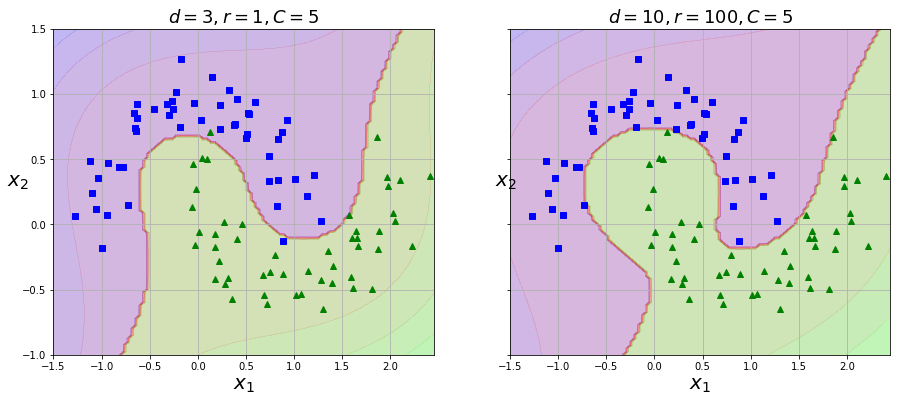

In [20]:
# 그림 [5-7]을 실제로 그리는 코드..

fig, axes = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])    #차수 3차, coef0=1, C=5인 모델
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])    #차수 10차, coef0=100, C=5인 모델
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

**분석**

- 차수가 커지면 좀더 과대적합된다

##5.2.2 유사도 특성

**유사도 함수**

- 각 샘플이 특정 **랜드마크**와 얼마나 닮았는지 측정하는 함수..

**가우시안 RBF**

$
{\displaystyle \phi_{\gamma}(\mathbf{x}, \boldsymbol{\ell})} = {\displaystyle \exp({\displaystyle -\gamma \left\| \mathbf{x} - \boldsymbol{\ell} \right\|^2})}
$

- 값이 0 ~ 1 사이이고, 작을수록 랜드마크에서 멀고, 클수록 가깝다..
- 종 모양의 그래프이다
- 이 값이 새로운 특성이 됨.. 원본특성은 없엠..
- $\boldsymbol{\ell}$ : **랜드마크 지점**
- $\gamma$ : 0보다 크고, 작을수록 종 모양의 폭이 넓음
    - 매개변수처럼 C와 적절하게 사용함

**책의 가우시안 RBF를 사용한 유사도 특성 그림 그리기**

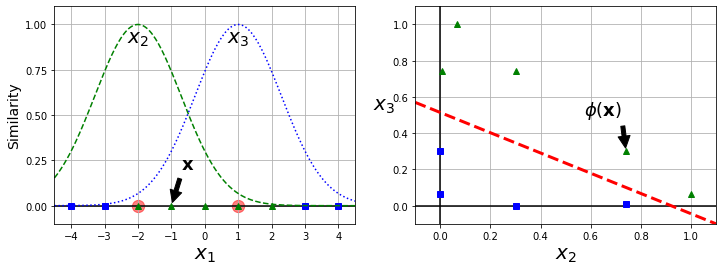

In [21]:
#x샘플들에 대한 가우시안 rbf
#x와 landmark가 2차원 배열일 것으로 기대..
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

#gamma값 지정
gamma = 0.3

#특성 지정.
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)  # 랜드마크 -2에 대한 가우시안 rbf
x3s = gaussian_rbf(x1s, 1, gamma)   # 랜드마크 1에 대한 가우시안 rbf

#XK = [X_2특성, X_3특성]
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')

#랜드마크 표시..
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")

#걍 1차원에 데이터 그리기..
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")

#가우시안 rbf그리기
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")

#추가 주석..
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])


plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

#그래프의 x축을 X_2특성, y축을 X_3특성으로 보고 점찍기
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
#결정경계 긋기..
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

In [22]:
# x = -1에 대한 X_2, X_3 특성값 확인..

x1_example = X1D[3,0]   #X1D를 reshape()했었음
for landmark in (-2, 1):
    #x1_example을 두 랜드마크에 대한 가우시안 rbf점수 확인..
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print(f"랜드마크가 {landmark}일 때 점 {x1_example}의 가우시안 rbf 값 : {k}")

랜드마크가 -2일 때 점 -1.0의 가우시안 rbf 값 : [0.74081822]
랜드마크가 1일 때 점 -1.0의 가우시안 rbf 값 : [0.30119421]


**랜드마크는 어떻게 선택하는가?**

- 전부다 랜드마크로 지정해도 된다..
- 근데 그럼 특성이 너무 많아진다..
- 잘 조절해야 한다..

##5.2.3 가우시안 RBF 커널

- 추가 특성을 모두 계산하려면 연산비용이 많이 든다..
- SVC모델을 사용해서 **커널 트릭**을 이용할 수 있다...

**매개변수**

- $\gamma$가 클수록..
        - 가우시안 rbf의 종모양이 좁아진다
        - 각 샘플의 영향 범위가 작아진다
        - 결정경계가 각 샘플을 따라 구불구불해진다..
        - 과대적합 가능성 up
- $\gamma$가 작을수록..
        - 가우시안 rbf의 종모양이 넓어진다
        - 각 샘플의 영향 범위가 작아진다
        - 결정경계가 더 부드러워진다
        - 과소적합 즘..??
    
- C와 $\gamma$를 함께 조정해서 모델의 복잡도를 적절히 조절한다
    - C : 클수록 하드 마진 분류.. / 작을수록 소프트 마진 분류..

In [23]:
#SVC를 이용한 가우시안rbf 커널 활용...
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

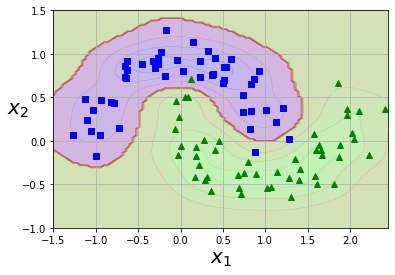

In [24]:
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])

**$\gamma$ 와 C의 조합으로 훈련한 결정함수들의 그래프**

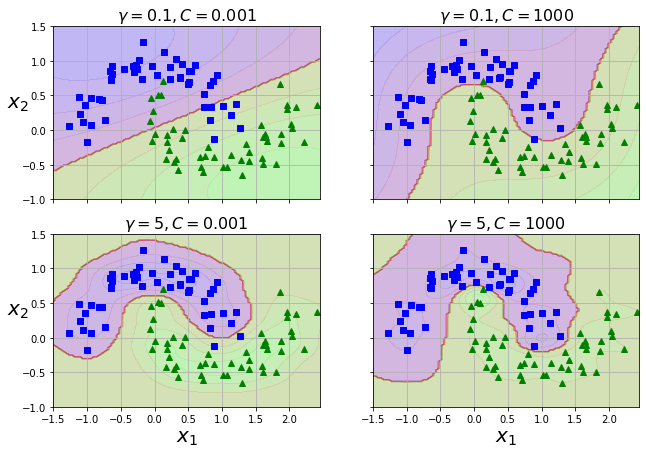

In [25]:
#책에는 없음..

from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

#하이퍼파라미터에 따라 다른 모델들을 모아놓을 리스트
svm_clfs = []
for gamma, C in hyperparams:
    #하이퍼파라미터마다 파이프라인 생성..
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C)),
    ])
    rbf_kernel_svm_clf.fit(X, y)    #훈련해서
    svm_clfs.append(rbf_kernel_svm_clf)     #모아놓자..

#subplots 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

#i로 어디에 subplot을 그릴지랑 svm_clf로 어느 모델의 결과를 그릴지 가져온다..
for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i//2, i%2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"$\gamma = {gamma}, C = {C}$", fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

**분석**

1) 왼쪽 위

- $\gamma$, C 둘 다 작다
- 경계가 부드럽고 소프트 마진 분류에 가깝다..

2) 오른쪽 위

- $\gamma$는 작고 C는 크다
- 경계가 부드럽고 하드 마진 분류에 가깝다..

3) 왼쪽 아래

- $\gamma$는 크고 C는 작다
- 경계가 구불구불하고 소프트 마진 분류에 가깝다..
- 샘플에 많이 맞추면서도 마진 오류도 조금 있다..

4) 오른쪽 아래

- $\gamma$, C 둘 다 크다
- 경계가 구불구불하고 하드 마진 분류에 가깝다
- 샘플에 많이 맞추고 마진 오류도 작게 한다..

##5.2.4 계산 복잡도

**샘플 m개, 특성 n개**

- LinearSVC 클래스
    - 시간복잡도 O(m*n)
    - 외부 메모리 학습 지원 안함
    - 스케일링 필요
    - 커널 트릭 지원 안함

- SGDClassifier 클래스
    - 시간복잡도 O(m*n)
    - 외부 메모리 학습 지원
    - 스케일링 필요
    - 커널 트릭 지원 안함

- SVC 클래스
    - 시간복잡도 O(m^2 * n) ~ O(m^3 * n)
    - 외부 메모리 학습 지원 안함
    - 스케일링 필요
    - **커널 트릭 지원**

#5.3 SVM 회귀

- 목표를 반대로 하여 회귀에 적용..
- 스케일링은 해야함..
- 제한된 마진 오류 안에서 도로 안에 가능한 많은 샘플이 들어가도록 학습..
- 마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없다!!
    
-> **$\epsilon$에 민감하지 않다!!**

###선형 SVM 회귀 ( LinearSVR )

정답 : $y = 3X + 4 + 잡음$

In [26]:
#회귀 데이터 준비..

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [27]:
# 스케일링은 필요..

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)    #epsilon으로 마진을 지정
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [28]:
#선형일때만 coef_특성 존재..

svm_reg.coef_, svm_reg.intercept_

(array([2.99278375]), array([3.53362371]))

**책 그림을 위한 코드**

In [29]:
# 서포트벡터를 찾아내는 함수..
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X) #예측해서
    #예측과 레이블이 마진보다 차이가 많이나면 서포트벡터..
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)  #인덱스만 반환..

# SVM 회귀의 예측, 마진을 그리는 함수..
def plot_svm_regression(svm_reg, X, y, axes):
    #그래프의 x축..
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)   #예측..
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")      #윗 마진 그리기
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")      #아랫 마진 그리기

    #찾은 서포트벡터 표시하기
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

In [30]:
#마진이 다른 모델을 만들어서 비교..
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)  #큰 마진
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)  #작은 마진
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [31]:
#서포트 벡터 구하기..
#support_특성이 원래 서포트 벡터의 인덱스를 저장하는 특성이다
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

#주석을 위한 지정..
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

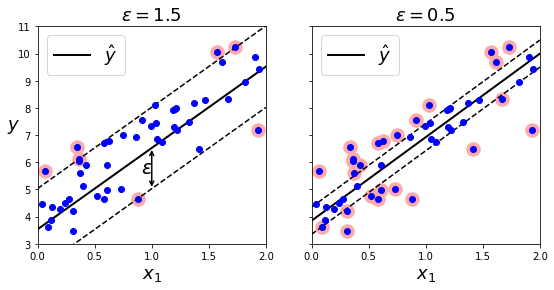

In [32]:
#그림 그리자..
fig, axes = plt.subplots(ncols=2, figsize=(9,4), sharey=True)

#마진이 1.5일 때
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(f"$\epsilon = {svm_reg1.epsilon}$", fontsize=18)
plt.ylabel(f"$y$", fontsize=18, rotation=0)
#마진 나타내는 화살표 및 주석
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)

#마진이 0.5일 때
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"$\epsilon = {svm_reg2.epsilon}$", fontsize=18)

plt.show()

###비선형 SVM 회귀 ( SVR )

정답 : $y = 0.5X^2 + 0.1X + 0.2 + 잡음$

In [33]:
# 데이터 준비..

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1    # -1 ~ 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [34]:
#스케일링 필요..
#다항식커널로 지정..

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [35]:
#서포트벡터의 갯수..

svm_poly_reg.n_support_

array([30], dtype=int32)

**책 그림을 위한 코드**

In [36]:
#매개변수가 다른 모델을 생성.. 매개변수 C(규제)의 차이

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

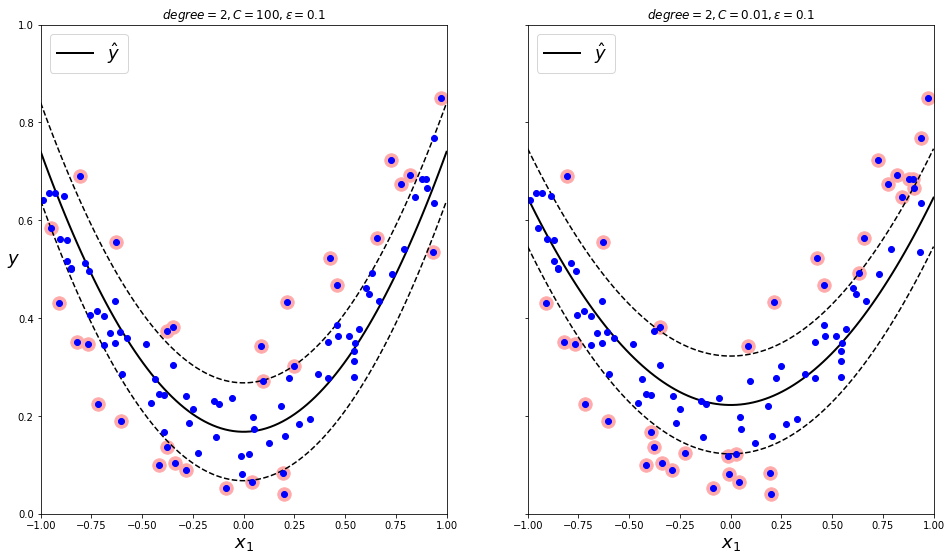

In [37]:
#그래프 그리기..

fig, axes = plt.subplots(ncols=2, figsize=(16, 9), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(f"$degree={svm_poly_reg1.degree}, C={svm_poly_reg1.C}, \epsilon={svm_poly_reg1.epsilon}$")
plt.ylabel("$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"$degree={svm_poly_reg2.degree}, C={svm_poly_reg2.C}, \epsilon={svm_poly_reg2.epsilon}$")

plt.show()

**서포트 벡터의 갯수**

- C가 크면 규제가 작고, 서포트 벡터의 갯수가 많아진다
- C가 작으면 규제가 많고, 서포트 벡터의 갯수가 적어진다

In [38]:
#서포트 벡터의 갯수
print(f"C = {svm_poly_reg1.C}일 때의 서포트벡터는 {svm_poly_reg1.n_support_}개 입니다.")
print(f"C = {svm_poly_reg2.C}일 때의 서포트벡터는 {svm_poly_reg2.n_support_}개 입니다.")

C = 100일 때의 서포트벡터는 [30]개 입니다.
C = 0.01일 때의 서포트벡터는 [36]개 입니다.


#5.4 SVM 이론

##5.4.1 결정 함수와 예측

##5.4.2 목적 함수

##5.4.3 콰드라틱 프로그래밍

##5.4.4 쌍대 문제

##5.4.5 커널 SVM

##5.4.6 온라인 SVM

#5.5 연습문제